**Import Necessary Libraries**

•	We import essential libraries for data handling, visualization, and machine learning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the Heart Attack Prediction Dataset**

* We load the heart attack prediction dataset from the CSV file stored in Google Drive into a pandas DataFrame.

*  We use display() to format them as tables (more readable than plain text)

In [ ]:
data = "/content/drive/MyDrive/Milestone 3.2 Data/Datasets/heart_attack_prediction_dataset.csv"
df = pd.read_csv(data)
display(df.head())

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


**Data Cleaning & Feature Engineering**

•	Handle missing values → Replace missing values with column mean.

•	Normalize exercise_per_week → Limit values to a max of 7.


•	Create a Health Score → Based on diet, exercise, and smoking habits.

•	Group people into Age Groups for analysis.


In [ ]:
def preprocess_data(df):
    """Handles missing values, normalizes data, and creates a Health Score."""
    for col in df.select_dtypes(include=['number']).columns:
        df[col].fillna(df[col].mean(), inplace=True)

    for col in df.select_dtypes(include=['object', 'category']).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

    if 'exercise_per_week' in df.columns:
        df['exercise_per_week'] = df['exercise_per_week'].clip(upper=7)

    if {'diet_score', 'exercise_per_week', 'smoking_status'}.issubset(df.columns):
        df['Health_Score'] = df['diet_score'] + df['exercise_per_week'] - (df['smoking_status'] * 2)

    if 'age' in df.columns:
        df['Age_Group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100],
                                 labels=['0-18', '19-35', '36-50', '51-65', '65+'])

    return df

heart_attack_data_processed = preprocess_data(df)

display(heart_attack_data_processed.head())

<ipython-input-6-dac344b114cc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-6-dac344b114cc>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


**Health Score Distribution**

• Visualize the distribution of the "Diet" column.

• Display the frequency with a histogram and KDE curve.

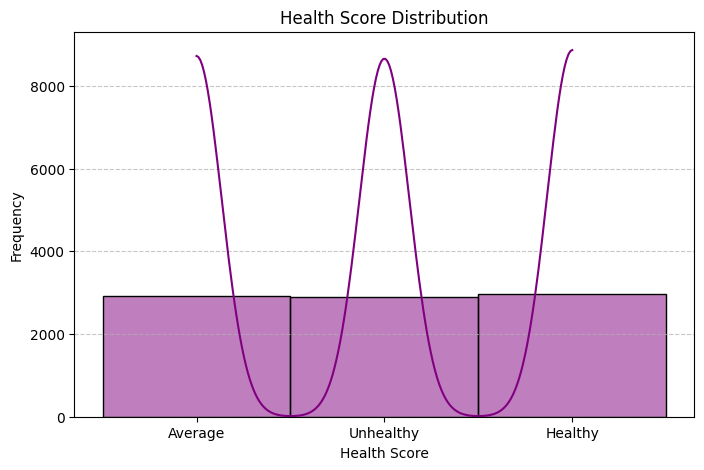

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(heart_attack_data_processed["Diet"], bins=20, kde=True, color="purple")

plt.title("Health Score Distribution")
plt.xlabel("Health Score")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Display Column Names**

• Show all the column names in the `heart_attack_data_processed` DataFrame.

• Useful for checking the structure and available data fields.

* Used  the attribute .shape to check the shape of the dataset. We got the number of rows and columns.

In [ ]:
print(heart_attack_data_processed.columns)

heart_attack_data_processed.shape

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


(8763, 26)

**Data Cleaning & Feature Engineering**

• Handle missing values → Replace missing values with column mean.

• Normalize exercise_per_week → Limit values to a max of 7.

• Create a Health Score → Based on diet, exercise, and smoking habits.

• Group people into Age Groups for analysis → Age data is divided into 7-year intervals (e.g., "18-27", "28-37", etc.) using `pd.cut` to categorize individuals into age groups, enabling more granular analysis of age-based trends in heart attack data.

In [ ]:
bins = list(range(18, 91, 10))
labels = [f"{b}-{b+9}" for b in bins[:-1]]

if "Age" in heart_attack_data_processed.columns:
    heart_attack_data_processed["Age Group"] = pd.cut(
        heart_attack_data_processed["Age"], bins=bins, labels=labels, right=False
    )

**Data Visualization & Analysis**

• Convert Heart Attack Risk to String → Change "Heart Attack Risk" to string for better visualization.

• Plot Disease Frequency by Age → A count plot shows the distribution of heart attack risk across age groups, using a custom color palette to distinguish between "No Risk" and "At Risk."

• Customize Plot Appearance → Title, axis labels, rotated x-axis, legend, and gridlines are added for better readability and clarity.

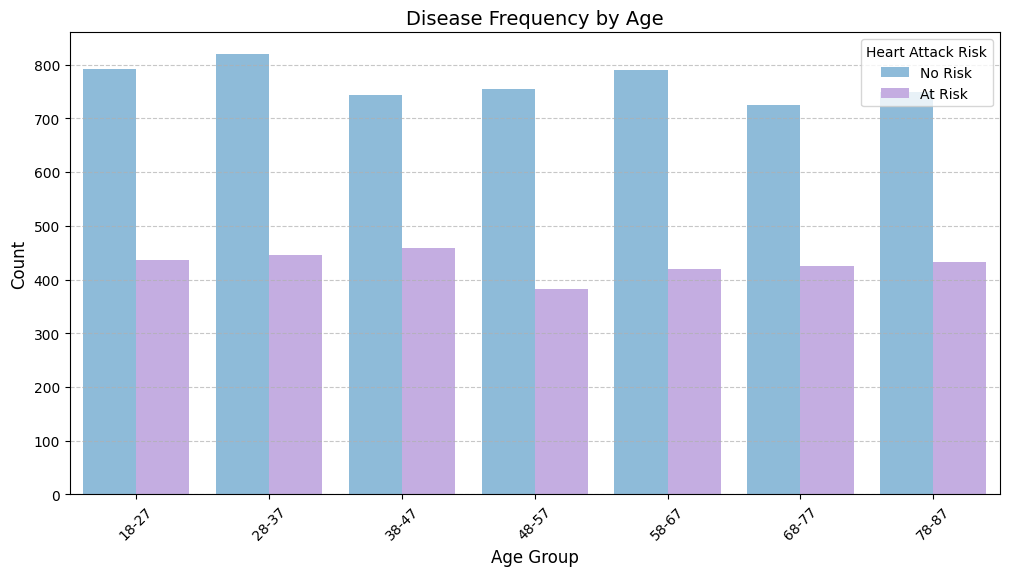

In [ ]:
heart_attack_data_processed["Heart Attack Risk"] = heart_attack_data_processed["Heart Attack Risk"].astype(str)

palette = {"0": "#81BDE6", "1": "#C3A4EA"}

plt.figure(figsize=(12, 6))
ax = sns.countplot(x="Age Group", hue="Heart Attack Risk", data=heart_attack_data_processed, palette=palette)

plt.title("Disease Frequency by Age", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Heart Attack Risk", labels=["No Risk", "At Risk"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**Data Visualization & Analysis**

• Group by Age → The "Age" column is divided into 7-year intervals (e.g., "18-27", "28-37") using `pd.cut` for better age group analysis.

• Plot Disease Frequency by Age → A count plot is created to visualize the frequency of heart disease across age groups, with bars colored in light yellow.

• Customize Plot Appearance → The plot includes a title, axis labels, rotated x-axis for readability, and gridlines for better clarity.

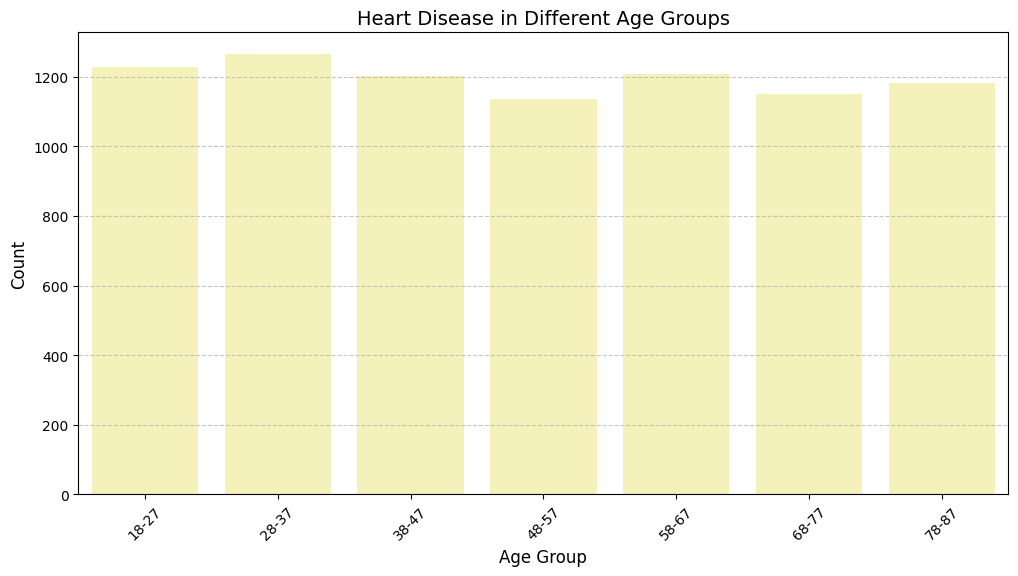

In [ ]:
bins = list(range(18, 91, 10))
labels = [f"{b}-{b+9}" for b in bins[:-1]]

if "Age" in heart_attack_data_processed.columns:
    heart_attack_data_processed["Age Group"] = pd.cut(
        heart_attack_data_processed["Age"], bins=bins, labels=labels, right=False
    )

plt.figure(figsize=(12, 6))
sns.countplot(x="Age Group", data=heart_attack_data_processed, color="#FFFAB0")

plt.title("Heart Disease in Different Age Groups", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**Data Visualization & Analysis**

• Convert Heart Attack Risk to String → "Heart Attack Risk" is converted to a string for better handling in the plot.

• Plot Heart Attack Risk by Age Group → A count plot visualizes the distribution of heart attack risk ("No Risk" vs. "At Risk") across age groups, with distinct colors for each risk category.

• Customize Plot Appearance → The plot includes a title, axis labels, a rotated x-axis for readability, a legend explaining risk categories, and gridlines for better clarity.

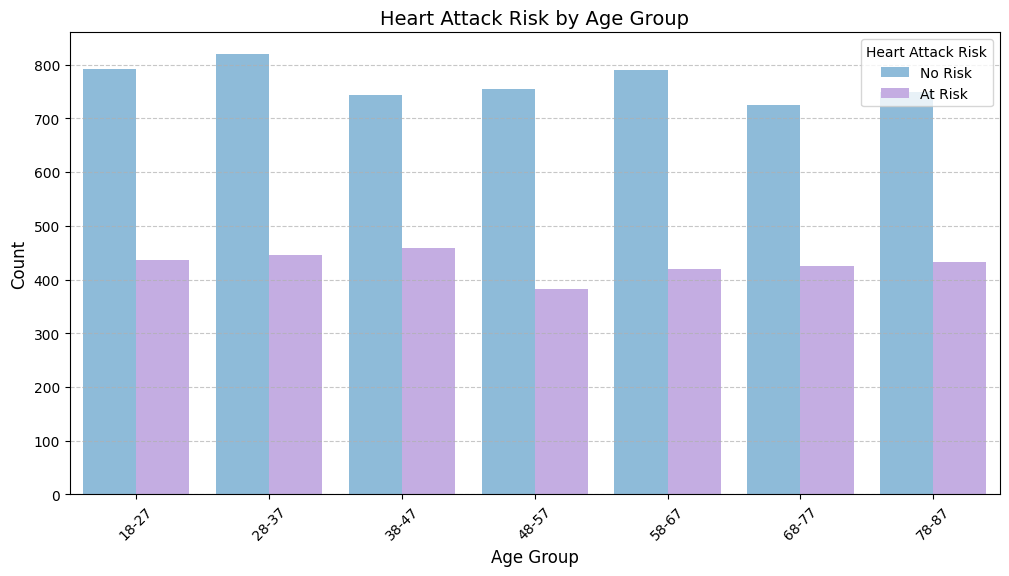

In [ ]:
plt.figure(figsize=(12, 6))

heart_attack_data_processed["Heart Attack Risk"] = heart_attack_data_processed["Heart Attack Risk"].astype(str)

sns.countplot(x="Age Group", hue="Heart Attack Risk", data=heart_attack_data_processed,
              palette={"0": "#81BDE6", "1": "#C3A4EB"})

plt.title("Heart Attack Risk by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Heart Attack Risk", labels=["No Risk", "At Risk"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**Data Visualization**

• Convert Heart Attack Risk to String → "Heart Attack Risk" is converted to a string for better plotting.

• Plot Disease Proportion → A pie chart visualizes the proportion of individuals with and without heart disease, with percentage labels and distinct colors for each category.


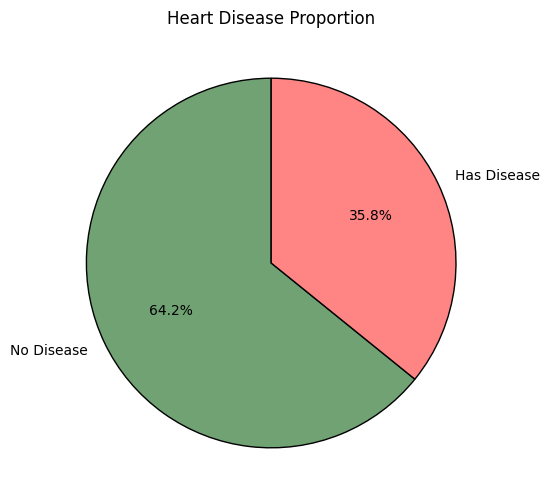

In [ ]:
plt.figure(figsize=(6, 6))

heart_attack_data_processed["Heart Attack Risk"] = heart_attack_data_processed["Heart Attack Risk"].astype(str)

heart_attack_data_processed["Heart Attack Risk"].value_counts().plot.pie(
    autopct="%1.1f%%",
    labels=["No Disease", "Has Disease"],
    colors=["#70A273", "#FF8484"],
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)

plt.title("Heart Disease Proportion")
plt.ylabel("")
plt.show()

**Data Visualization**

• Calculate Correlation → The correlation matrix for numeric columns is computed to examine relationships between features.

• Plot Correlation Heatmap → A heatmap is generated to visualize the correlation between features, with annotations for correlation values and a color gradient representing the strength of the relationships.

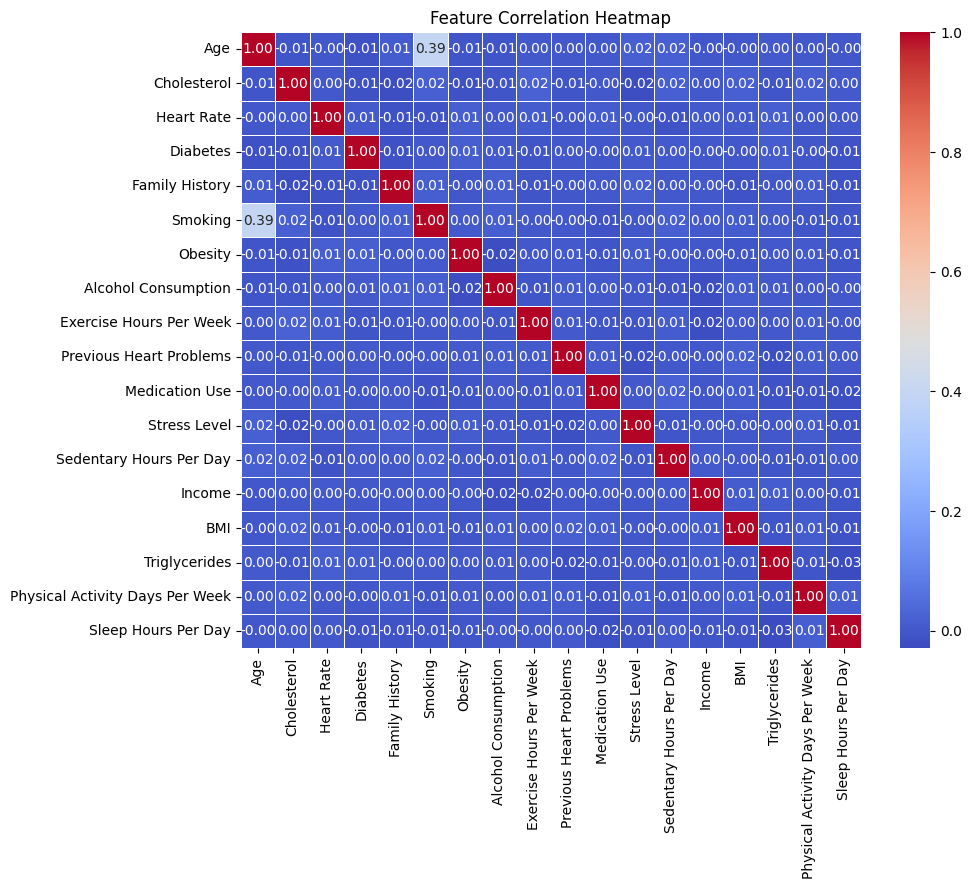

In [ ]:
numeric_columns = heart_attack_data_processed.select_dtypes(include=['number']).columns
corr = heart_attack_data_processed[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Data Visualization**

• Plot Smokers vs Non-Smokers → A pie chart visualizes the distribution of smokers and non-smokers in the dataset, with percentage labels and distinct colors for each group.

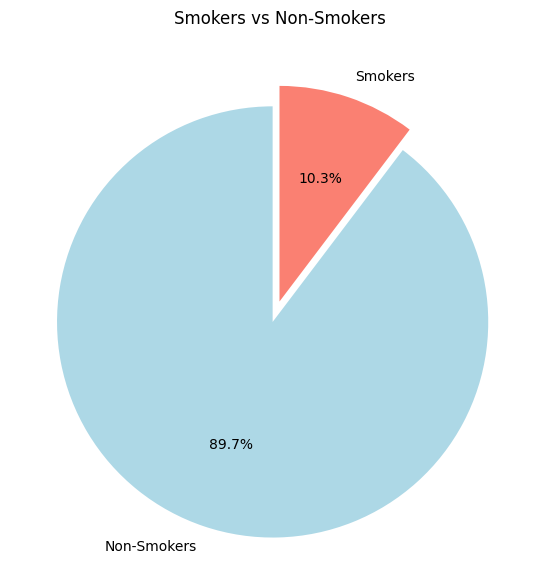

In [ ]:
smoking_counts = heart_attack_data_processed['Smoking'].value_counts()

labels = ['Non-Smokers', 'Smokers']
colors = ['lightblue', 'salmon']

plt.figure(figsize=(7, 7))
plt.pie(smoking_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.1, 0))
plt.title('Smokers vs Non-Smokers')
plt.show()

**Data Visualization**

• Plot Pairplot of Features → A pairplot is created to visualize relationships between "Age," "BMI," and "Heart Attack Risk," showing scatter plots and distributions for each feature.

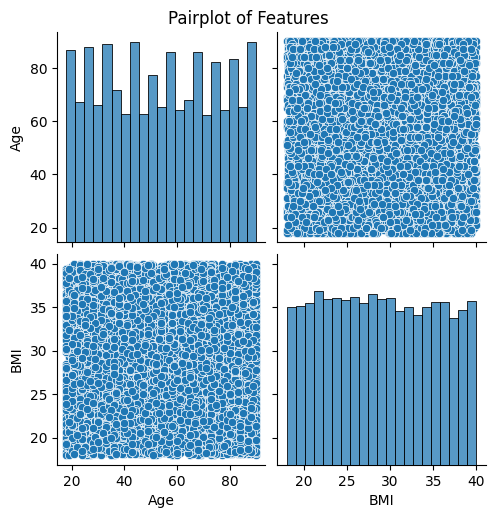

In [ ]:
sns.pairplot(heart_attack_data_processed[['Age', 'BMI', 'Heart Attack Risk']])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()